# Phase 3 - Bivariate charts
*TEAM 5*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [2]:
movies = pd.read_csv('../data/us.movies.actors.tsv', sep='\t', dtype=object)

### Variables to study

In [3]:
movies.head().columns.values

array(['tconst', 'nconst', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'isOriginalTitle', 'averageRating', 'numVotes'], dtype=object)

In [4]:
def round_n(x, n=10): # Function to round a number with the base n (used for years)
    return int(n * round(float(x)/n))

## Repartition of the runtime of the movie as a function of the year

In [5]:
df = movies[['tconst', 'startYear', 'runtimeMinutes']].copy().drop_duplicates().drop("tconst", axis=1)

# Remove empty values
df.startYear = df.startYear.replace('\\N', np.nan)
df.runtimeMinutes = df.runtimeMinutes.replace('\\N', np.nan)

df = df.dropna()

# Convert to appropriate variable type
df.startYear = df.startYear.astype(int)
df.runtimeMinutes = df.runtimeMinutes.astype(int)

# Round years (binning) 
df.startYear = df.startYear.apply(round_n, n=5)

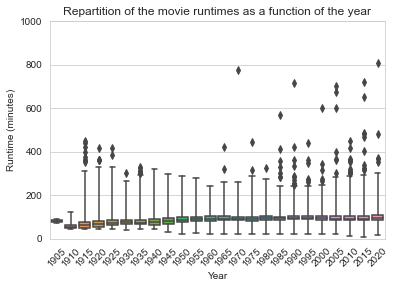

In [6]:
# Plot
sns.boxplot(data = df, x="startYear", y="runtimeMinutes", whis = 10)

plt.title("Repartition of the movie runtimes as a function of the year")
plt.xlabel('Year'); plt.ylabel('Runtime (minutes)')
plt.ylim([0, 1000])
plt.xticks(rotation=45)
plt.show()

## Average ratings as a function of the number of votes

In [7]:
df = movies[['tconst', 'averageRating', 'numVotes']].copy().drop_duplicates().drop("tconst", axis=1)

# Convert to appropriate variable type
df['averageRating'] = df['averageRating'].astype(float)
df['numVotes'] = df['numVotes'].astype(int)

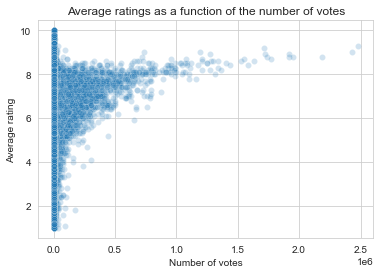

In [8]:
sns.scatterplot(data = df, x="numVotes", y="averageRating", alpha=.2)

plt.title("Average ratings as a function of the number of votes")
plt.xlabel('Number of votes'); plt.ylabel('Average rating')
plt.show()

## Evolution of the number of movies for the top-10 movie genres with the years

In [9]:
df = movies[['tconst', 'startYear', 'genres']].copy().drop_duplicates().drop("tconst", axis=1)

# Remove empty values
df.startYear = df.startYear.replace('\\N', np.nan)

main_genres = df.genres.value_counts()[:10].index
df.genres = df.genres.apply(lambda x: x if x in main_genres else np.nan)
df.genres = df.genres.replace('\\N', np.nan)

df = df.dropna()

# Convert to appropriate variable type
df.startYear = df.startYear.astype(int)

# Count number of years and genre combinations
df = df.value_counts().reset_index().rename({0:'n'}, axis=1)

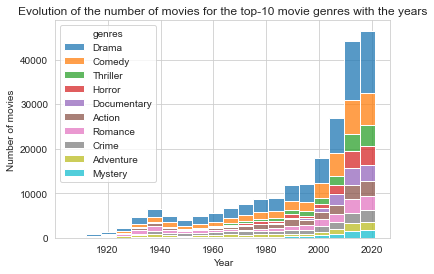

In [10]:
# Plot
sns.histplot(data = df, x ="startYear", weights= "n", hue = "genres", multiple='stack', bins=20)

plt.title("Evolution of the number of movies for the top-10 movie genres with the years")
plt.xlabel('Year'); plt.ylabel('Number of movies')
plt.show()

## Evolution of the number of votes with the years

In [11]:
df = movies[['tconst', 'startYear', 'numVotes']].copy().drop_duplicates().drop("tconst", axis=1)

# Remove empty values
df.startYear = df.startYear.replace('\\N', np.nan)
df.numVotes = df.numVotes.replace('\\N', np.nan)

df = df.dropna()

# Convert to appropriate variable type
df.startYear = df.startYear.astype(int)
df.numVotes = df.startYear.astype(int)

# Round and group years
df.startYear = df.startYear.apply(round_n, n=5)
df = df.groupby('startYear')['numVotes'].agg(sum).reset_index()

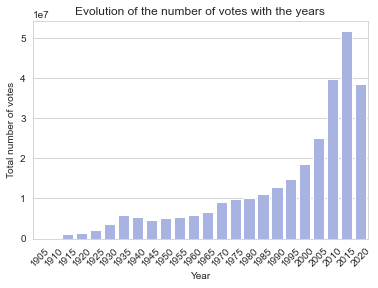

In [12]:
# Plot
sns.barplot(data = df, x ="startYear", y= "numVotes", color='#A0ADEA')

plt.title("Evolution of the number of votes with the years")
plt.xlabel('Year'); plt.ylabel('Total number of votes')
plt.xticks(rotation=45)
plt.show()

## Repartition of the ratings as a function of the genres 

In [13]:
df = movies[['tconst', 'genres', 'averageRating']].copy().drop_duplicates().drop("tconst", axis=1)

# Remove empty values
df.genres = df.genres.replace('\\N', np.nan)
main_genres = df.genres.value_counts()[:10].index
df.genres = df.genres.apply(lambda x: x if x in main_genres else np.nan)
df.averageRating = df.averageRating.replace('\\N', np.nan)

df = df.dropna()

# Convert to appropriate variable type
df.averageRating = df.averageRating.astype(float)

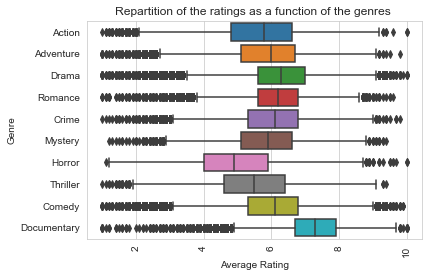

In [14]:
# Plot 
sns.boxplot(data = df, x="averageRating", y="genres")

plt.title("Repartition of the ratings as a function of the genres ")
plt.xlabel('Average Rating'); plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.show()

## Frequency of each language for each title

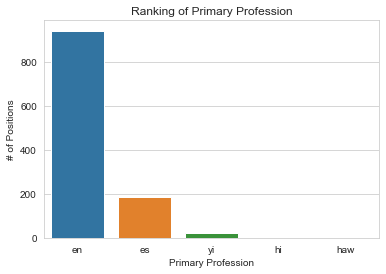

In [23]:
df = movies[['tconst','language']].copy().drop_duplicates().drop('tconst',axis=1)
df.language = df.language.replace('\\N', np.nan)
df = df.dropna()

sns.countplot(data=df,x="language",order=df['language'].value_counts().index)

plt.title("Ranking of Primary Profession")
plt.xlabel('Primary Profession'); plt.ylabel('# of Positions')
plt.xticks(rotation=0)
plt.show()

## Describing the distribution of genres of movies

/Applications/JupyterLab.app/Contents/Resources/jlab_server/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/JupyterLab.app/Contents/Resources/jlab_server/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


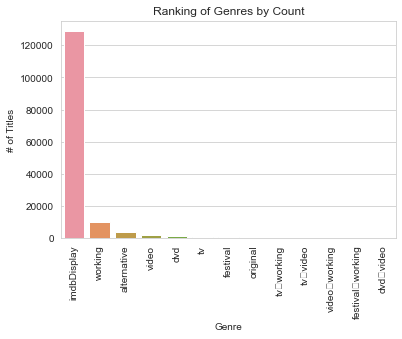

In [31]:
df = movies[['tconst','types']].copy().drop_duplicates().drop('tconst',axis=1)
df.types = df.types.replace('\\N', np.nan)
df = df.dropna()

sns.countplot(data=df,x="types",order=df['types'].value_counts().index)
plt.title("Ranking of Genres by Count")
plt.xlabel('Genre'); plt.ylabel('# of Titles')
plt.xticks(rotation=90)
plt.show()

## Categorizing movies by whether or not they are adult titles

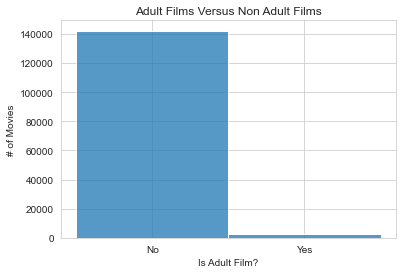

In [19]:
df = movies[['tconst','isAdult']].copy().drop_duplicates().drop('tconst',axis=1)
df.isAdult = df.isAdult.replace('\\N', np.nan)
df = df.dropna()

plot = sns.histplot(data = df,x = 'isAdult',bins = 2)

plt.title("Adult Films Versus Non Adult Films")
plt.xlabel('Is Adult Film?'); plt.ylabel('# of Movies')
plot.set_xticks([0,1])
plot.set_xticklabels(['No','Yes'])
plt.show()